In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

(1, 20)
[[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
  0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
  0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
  0.94736842 1.        ]]
(1, 20) (1, 20)
mine [[0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14 0.14
  0.14 0.14 0.14 0.14 0.14 0.14]]
[[ 0.         -0.3518946  -0.6009611  -0.74823438 -0.83269027 -0.88284124
  -0.91418814 -0.93478358 -0.94892026 -0.95899138 -0.96639515 -0.97198483
  -0.97630178 -0.97970148 -0.98242445 -0.98463783 -0.9864605  -0.98797877
  -0.98925651 -0.99034175]]


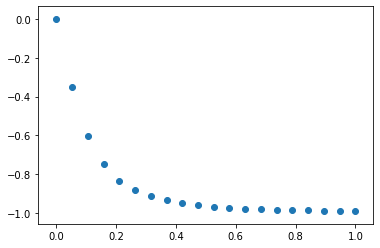

[[1.         0.93603963 0.79927827 0.66343448 0.55373903 0.46967154
  0.40529008 0.35521776 0.31551599 0.28343523 0.25706111 0.2350436
  0.21641356 0.20046199 0.18666065 0.17460911 0.16399906 0.15458962
  0.14619013 0.13864784]]
[[1.         0.93603963 0.79927827 0.66343448 0.55373903 0.46967154
  0.40529008 0.35521776 0.31551599 0.28343523 0.25706111 0.2350436
  0.21641356 0.20046199 0.18666065 0.17460911 0.16399906 0.15458962
  0.14619013 0.13864784]]


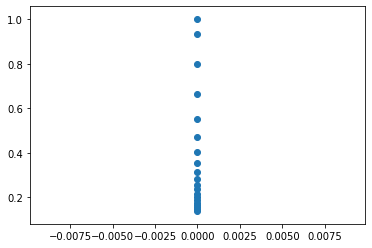

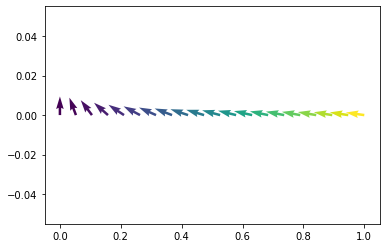

In [40]:
def dhdt(h,x):
    return -h+3*x*g(h)
def dxdt(h,x):
    return (2.8-x-9*x*g(h))/20

def g(inpt):
    retrn=np.zeros((inpt.shape))
    retrn[inpt<=0.4]=0.2
    inds=np.where((inpt>0.4)&(inpt<0.8))
    retrn[inds]=2*inpt[inds]-0.6
    retrn[inpt>=0.8]=1
    '''
    if inpt<=0.4:
        return 0.2
    elif inpt>0.4 and inpt<0.8:
        return 2*inpt-0.6
    elif inpt>=0.8:
        return 1
    '''
        
    return retrn

def g_aux(inpt):
    if inpt<=0.4:
        return 0.2
    elif inpt>0.4 and inpt<0.8:
        return 2*inpt-0.6
    elif inpt>=0.8:
        return 1

x = np.linspace(0,1,20)
y = np.arange(0,1,20)

def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ -X[0]+3*X[1]*g(X[0]), (2.8-X[1]-9*X[1]*g(X[0]))/20])

X1 , Y1  = np.meshgrid(x, y) # create a grid
print(X1.shape)
#print('zoom',X1.shape,Y1.shape)
print(X1)
#print(X1)
#DX1, DY1 = [dhdt(X1,Y1), dxdt(X1,Y1)]
DX1,DY1=Sys([X1,Y1])
print(DX1.shape,DY1.shape)
print('mine',DY1)
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M
plt.scatter(X1,DX1)
print(DX1)
plt.show()
print(DY1)
plt.scatter(Y1,DY1)
print(DY1)
plt.show()
plt.quiver(X1, Y1, DX1, DY1, M)

(1000, 2)


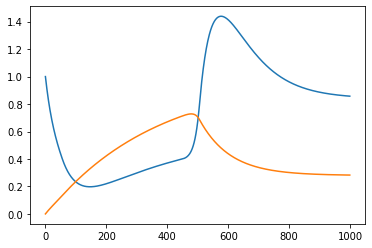

In [39]:
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ -X[0]+3*X[1]*g_aux(X[0]), (2.8-X[1]-9*X[1]*g_aux(X[0]))/20])
Sys0 = np.array([1, 0])
t = np.linspace(0, 20,  1000)
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
print(X.shape)
plt.plot(X)

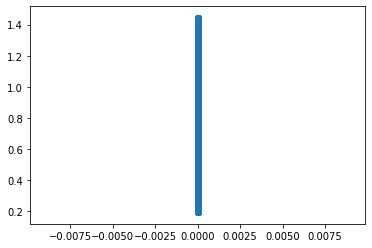

In [45]:
plt.scatter()